# Monte Carlo Profile Confidence Intervals for Dynamic Systems
    E Ionides, C. Breto, J Park, R. A. Smith, A. A. King

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

import os


In [62]:
R0    = 3
gamma = 1/7
beta  = R0*gamma
N     = 1e8

beta_truth  = beta
gamma_truth = gamma

priors_range_dict  = {}
priors_range_dict["beta"]  = [0.3, 1] # Contact rate
priors_range_dict["gamma"] = [1/10, 1/3]  # Recovery rate range

beta_search   = np.arange(priors_range_dict["beta"][0], priors_range_dict["beta"][1], 0.02)
gamma_search  = np.arange(priors_range_dict["gamma"][0], priors_range_dict["gamma"][1], 0.02)


In [63]:
log_lik = np.load(os.path.join( 'likelihood_surface.npz'))["loglik_array"]
log_lik.shape

loglik_df = []
for idx_beta, beta in enumerate(beta_search):
    for idx_gamma, gamma in enumerate(gamma_search):
        th_df =  pd.DataFrame(columns=["value", "ens_id", "beta", "gamma"])
        th_df["value"]  = -log_lik[idx_beta, idx_gamma, :].copy()
        th_df["ens_id"] = list(range(len(th_df)))
        th_df["beta"]   = beta
        th_df["gamma"]  = gamma
        loglik_df.append(th_df)

loglik_df = pd.concat(loglik_df)
loglik_df = loglik_df.groupby(["beta", "gamma"]).mean()[["value"]].reset_index()

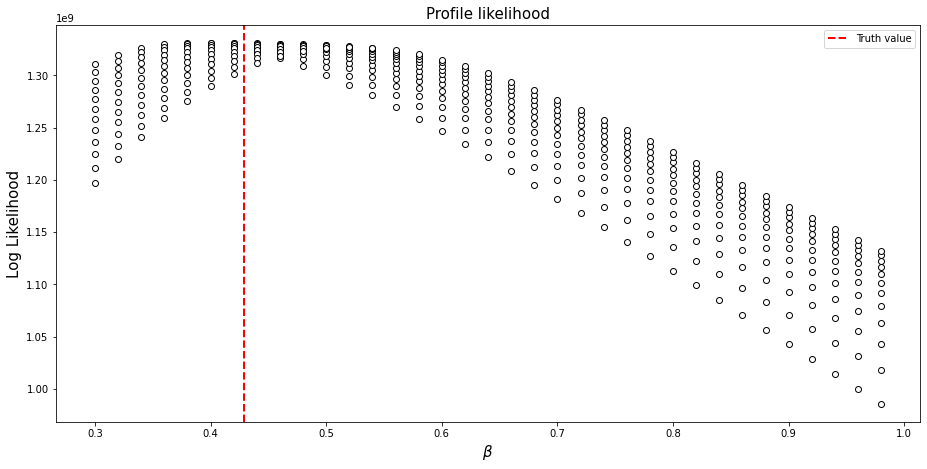

In [140]:
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(15.5, 7.3))

ax.scatter(loglik_df.beta, -loglik_df.value, edgecolor="k", facecolor="white")
#sns.scatterplot(ax=ax, data=loglik_df, x="beta", y="value", hue="gamma", facecolor="white", edgecolor="k")

ax.axvline(x=beta_truth, color="red", linestyle="--", lw=2, label="Truth value")
ax.set_xlabel(r"$\beta$", fontsize=15)
ax.set_ylabel("Log Likelihood", fontsize=15)
ax.set_title("Profile likelihood", fontsize=15)
ax.legend()

In [131]:
from scipy.stats import chi2 as qchisq
import statsmodels.formula.api as sm
from scipy import linalg
from math import ceil
import numpy as np


def mcap

    lowess_sm = sm.nonparametric.lowess
    x_new   =  np.linspace(min(beta_search), max(beta_search), 1000)
    yfitted = lowess_sm(-loglik_df.value, loglik_df.beta, frac=0.1, it=3, return_sorted = False, xvals=x_new)

    arg_max = np.argmax(yfitted)
    arg_max, x_new[arg_max]

    disttance = abs(beta_search-x_new[arg_max])
    max_dist  = np.max(disttance)

    weights = np.full( len(beta_search), np.nan)
    weights = (1-(disttance/max_dist)**3)**3
    #weights[included] <- (1-(dist[included]/maxdist)^3)^3



    data  = {"b":beta_search, "a":beta_search**2, "lp":-loglik_df.groupby("beta").mean()[["value"]].values}
    model = sm.wls(formula = 'lp ~ a + b', data = data, weights=weights).fit()

    b      = model.params["b"]
    a      = model.params["a"]

    var_a  = model.cov_params().loc["a"]["a"]
    var_b  = model.cov_params().loc["a"]["a"]
    cov_ab = model.cov_params().loc["a"]["b"]

    se_mc_squared    = (1 / (4 * a**2)) * (var_b - (2 * b/a) * cov_ab + (b**2 / a**2) * var_a)
    se_stat_squared  = 1/(2*a)
    se_total_squared = se_mc_squared + se_stat_squared
    loglik_diff      = max(yfitted) -  yfitted

    delta            = qchisq.ppf(0.95, 1) * ( a * se_mc_squared + 0.5)
    ci               = x_new[np.where(loglik_diff < delta)]
    ci_low           = ci[0]
    ci_high          = ci[-1]

    df_fit = pd.DataFrame(columns=["parameter", "loglik_smooth", "quadratic"])
    df_fit["parameter"]     = x_new
    df_fit["loglik_smooth"] = yfitted
    df_fit["quadratic"]     = a * x_new**2 + b * x_new + model.params["Intercept"]


,parameter,loglik_smooth,quadratic
0,0.300000,1.263219e+09,1.278915e+09
1,0.300681,1.263708e+09,1.279203e+09
2,0.301361,1.264196e+09,1.279491e+09
3,0.302042,1.264685e+09,1.279777e+09
4,0.302723,1.265173e+09,1.280062e+09
...,...,...,...
995,0.977277,1.100918e+09,9.965406e+08
996,0.977958,1.100571e+09,9.956832e+08
997,0.978639,1.100224e+09,9.948247e+08
998,0.979319,1.099877e+09,9.939650e+08


array([1.26403037e+09, 1.26451914e+09, 1.26500766e+09, 1.26549593e+09,
       1.26598394e+09, 1.26647171e+09, 1.26695923e+09, 1.26744651e+09,
       1.26793354e+09, 1.26842033e+09, 1.26890689e+09, 1.26939321e+09,
       1.26987931e+09, 1.27036519e+09, 1.27085085e+09, 1.27133632e+09,
       1.27182159e+09, 1.27230668e+09, 1.27279160e+09, 1.27327637e+09,
       1.27376101e+09, 1.27424553e+09, 1.27472997e+09, 1.27521435e+09,
       1.27569870e+09, 1.27618307e+09, 1.27666750e+09, 1.27715205e+09,
       1.27763679e+09, 1.27812180e+09, 1.27860718e+09, 1.27909304e+09,
       1.27957948e+09, 1.28006664e+09, 1.28055467e+09, 1.28104375e+09,
       1.28153407e+09, 1.28202577e+09, 1.28251881e+09, 1.28301267e+09,
       1.28350577e+09, 1.28399486e+09, 1.28447515e+09, 1.28494305e+09,
       1.28540087e+09, 1.28585400e+09, 1.28629365e+09, 1.28671482e+09,
       1.28712232e+09, 1.28752351e+09, 1.28792344e+09, 1.28832450e+09,
       1.28872745e+09, 1.28913232e+09, 1.28953890e+09, 1.28994690e+09,
      

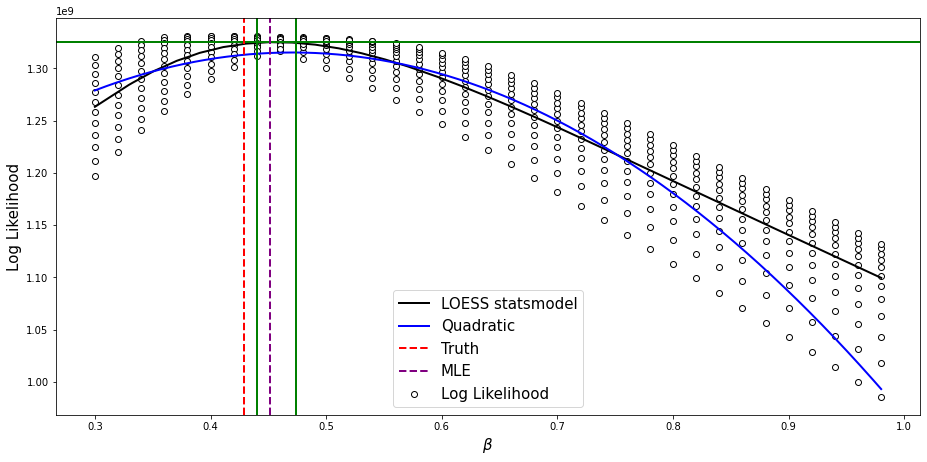

In [153]:
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(15.5, 7.3))

ax.scatter(loglik_df.beta, -loglik_df.value, edgecolor="k", facecolor="white", label="Log Likelihood")
ax.plot(df_fit.parameter, df_fit.loglik_smooth, color="black", label = "Smoothed Log Likelihood", lw=2)
ax.plot(df_fit.parameter, df_fit.quadratic, color="blue", label = "Quadratic", lw=2)

ax.axvline(x=ci_low, color="green", linestyle="-", lw=1)
ax.axvline(x=ci_high, color="green", linestyle="-", lw=1)
a = max(yfitted)
ax.axhline(y=a, color="green", linestyle="-", lw=1)

ax.axvline(x=beta_truth, color="red", linestyle="--", lw=1, label="Truth")
ax.axvline(x=x_new[arg_max], color="purple", linestyle="--", lw=1, label="MLE")

ax.set_xlabel(r"$\beta$", fontsize=15)
ax.set_ylabel("Log Likelihood", fontsize=15)
ax.legend(fontsize=15)


In [ ]:
R0    = 3
gamma = 1/7
beta  = R0*gamma
N     = 1e8

beta_truth  = beta
gamma_truth = gamma

num_days = 100
x  = [N-0.01*N, 0.01*N, 0, 0.01*N]

x_sol      = np.zeros((num_days, 4))

x_sol[0, :] = x
for d_idx in range(1, num_days):
    x_sol[d_idx, :] = model(x_sol[d_idx-1, :], beta, gamma, N)

x_sol_df = pd.DataFrame(x_sol, columns=["S", "I", "R", "C"]); x_sol_df.index.name="date"